<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Click-That-Recommendation-Button" data-toc-modified-id="Click-That-Recommendation-Button-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Click That Recommendation Button</a></span><ul class="toc-item"><li><span><a href="#Business-Understanding-and-Business-Problem" data-toc-modified-id="Business-Understanding-and-Business-Problem-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Business Understanding and Business Problem</a></span><ul class="toc-item"><li><span><a href="#Cost-of-Errors" data-toc-modified-id="Cost-of-Errors-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Cost of Errors</a></span></li></ul></li><li><span><a href="#Data-Understanding" data-toc-modified-id="Data-Understanding-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Understanding</a></span><ul class="toc-item"><li><span><a href="#Initial-Data" data-toc-modified-id="Initial-Data-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Initial Data</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Exploring-links_df" data-toc-modified-id="Exploring-links_df-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Exploring <code>links_df</code></a></span></li><li><span><a href="#Exploring-movies_df" data-toc-modified-id="Exploring-movies_df-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Exploring <code>movies_df</code></a></span></li><li><span><a href="#Exploring-ratings_df" data-toc-modified-id="Exploring-ratings_df-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Exploring <code>ratings_df</code></a></span></li><li><span><a href="#Exploring-tags_df" data-toc-modified-id="Exploring-tags_df-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Exploring <code>tags_df</code></a></span></li><li><span><a href="#Creating-a-New-DataFrame-with-Relevant-Data" data-toc-modified-id="Creating-a-New-DataFrame-with-Relevant-Data-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Creating a New DataFrame with Relevant Data</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#First-Baseline-Model" data-toc-modified-id="First-Baseline-Model-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>First Baseline Model</a></span><ul class="toc-item"><li><span><a href="#Cross-Validate-Baseline-Model" data-toc-modified-id="Cross-Validate-Baseline-Model-1.4.1.1"><span class="toc-item-num">1.4.1.1&nbsp;&nbsp;</span>Cross-Validate Baseline Model</a></span></li></ul></li><li><span><a href="#Checking-Other-Models" data-toc-modified-id="Checking-Other-Models-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Checking Other Models</a></span></li><li><span><a href="#GridSearch-of-Top-Model" data-toc-modified-id="GridSearch-of-Top-Model-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>GridSearch of Top Model</a></span></li></ul></li></ul></li><li><span><a href="#New-Users-and-Predictions" data-toc-modified-id="New-Users-and-Predictions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>New Users and Predictions</a></span><ul class="toc-item"><li><span><a href="#making-predictions-with-surprise-(I-think-we-can-delete-this-but-am-keeping-it-for-now-for-reference)" data-toc-modified-id="making-predictions-with-surprise-(I-think-we-can-delete-this-but-am-keeping-it-for-now-for-reference)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>making predictions with surprise (I think we can delete this but am keeping it for now for reference)</a></span></li><li><span><a href="#Final-Model" data-toc-modified-id="Final-Model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Final Model</a></span></li><li><span><a href="#Results/Conclusions" data-toc-modified-id="Results/Conclusions-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Results/Conclusions</a></span><ul class="toc-item"><li><span><a href="#Further-Exploration/Questions" data-toc-modified-id="Further-Exploration/Questions-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Further Exploration/Questions</a></span></li></ul></li></ul></li></ul></div>

![header](images/header.png)

# Click That Recommendation Button
**Authors:** Jonathan Fetterolf, Matthew Duncan, Jasmine Huang, Michael Licul

## Business Understanding and Business Problem

Our team has been tasked with implementation of a recommendation system for the movie rental company, RedBox. We have three main goals:

- Create a recommendation system model that allows users to input movie ratings and provides movie suggestions
- Be able to store user ratings for future recommendation requests
- Be able to provide specific genre recommendations based on a users request

### Cost of Errors

Cost of Errors is somewhat ephemeral for this project. The main cost of errors would be user trust and loyalty. 

While the goal is to build user loyalty and create a seamless user experience from recommendation to rental, if users don't find value in the recommendations provided than that loyalty is lost in an instant.

## Data Understanding

**Note:** There is a .py script within this repo (functions.py) that is required for this notebook to run properly.

In [2]:
# from random import gauss as gs, uniform as uni, seed

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns

# from sklearn.linear_model import LinearRegression

from surprise import Reader, Dataset
from surprise.model_selection import train_test_split, GridSearchCV, cross_validate
from surprise.prediction_algorithms import *
from surprise.similarities import cosine, msd, pearson
from surprise import accuracy



import warnings
warnings.filterwarnings('ignore')

import functions

### Initial Data

Our data was provided by MovieLens and the dataset includes over 100,000 ratings made by 600 users across almost 10,000 movies with data broken into four different .CSV files. Further analysis of these files is discussed below.

In [3]:
#the four csv files provided
links_df = pd.read_csv('data/links.csv')
movies_df = pd.read_csv('data/movies.csv')
ratings_df = pd.read_csv('data/ratings.csv')
tags_df = pd.read_csv('data/tags.csv')

In [4]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [5]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [8]:
sim_cos = {'name':'msd', 'user_based':False}

## Exploratory Data Analysis

### Exploring `links_df`

This .CSV file is a key to merge movie identifiers with IMDB Database and The Movie DataBase. We will be focusing on the MovieLens database for this analysis and will not need this file.

In [9]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


### Exploring `movies_df`

This .CSV file will be very helpful for our analysis. It provides us with the title of movie in relation to its unique identifier and lets us know the genre categories that the movie would fall under.

In [10]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
movies_df.shape

(9742, 3)

In [12]:
movies_df.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [13]:
movies_df['title'].nunique()

9737

In [14]:
movies_df['title'].value_counts().head(10)

Saturn 3 (1980)                           2
War of the Worlds (2005)                  2
Eros (2004)                               2
Confessions of a Dangerous Mind (2002)    2
Emma (1996)                               2
Theremin: An Electronic Odyssey (1993)    1
Broken Arrow (1996)                       1
Daddy Day Care (2003)                     1
Transporter 3 (2008)                      1
Antonia's Line (Antonia) (1995)           1
Name: title, dtype: int64

There are 9737 unique movie titles. Repeats for 5 movies:
- Emma (1996)                                   2
- Saturn 3 (1980)                               2
- Eros (2004)                                   2
- Confessions of a Dangerous Mind (2002)        2
- War of the Worlds (2005)                      2

Cleaning the text in the DataFrame.

In [15]:
movies_df['split_genres'] = movies_df['genres'].iloc[0:].apply(lambda x: x.title().split('|'))
movies_df['genres'] = movies_df['genres'].iloc[0:].apply(lambda x: x.lower())

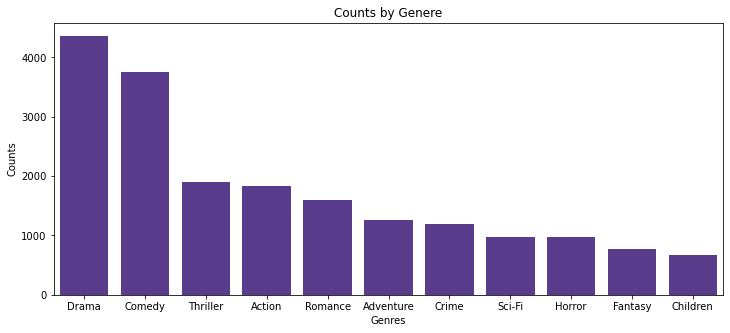

In [17]:
purple = ['#572f99']

genre_counts_names = functions.to_1D(movies_df['split_genres']).value_counts().index.tolist()
genre_counts_values = functions.to_1D(movies_df['split_genres']).value_counts().values


fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x=genre_counts_names[:11], y=genre_counts_values[:11], color='#572f99', ax=ax)
ax.set_title('Counts by Genere')
ax.set_ylabel('Counts')
ax.set_xlabel('Genres');

In [19]:
genre_counts_names[0].title()

'Drama'

### Exploring `ratings_df`

This .CSV will be the primary datafile for this analysis. It includes relevant information including `userId`, `rating`, and `movieId`. `timestamp` is not relevant for this analysis and will be dropped.

In [20]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [21]:
ratings_df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [22]:
# The 10 movies with the most reviews
ratings_df.groupby('movieId').count().sort_values('userId', ascending=False).head(10)

,userId,rating,timestamp
movieId,,,
356,329,329,329
318,317,317,317
296,307,307,307
593,279,279,279
2571,278,278,278
260,251,251,251
480,238,238,238
110,237,237,237
589,224,224,224


In [23]:
# the 10 movies with the highest ratings
ratings_df.groupby('movieId').mean().sort_values('rating', ascending=False).head(10)

,userId,rating,timestamp
movieId,,,
88448,483.0,5.0,1.315438e+09
100556,462.0,5.0,1.456151e+09
143031,89.0,5.0,1.520409e+09
143511,105.0,5.0,1.526207e+09
143559,89.0,5.0,1.520410e+09
6201,474.0,5.0,1.100120e+09
102217,63.0,5.0,1.443200e+09
102084,380.0,5.0,1.493422e+09
6192,182.0,5.0,1.063275e+09


In [24]:
# the 10 users with the most reviews
ratings_df.groupby('userId').count().sort_values('rating', ascending=False).head(10)

,movieId,rating,timestamp
userId,,,
414,2698,2698,2698
599,2478,2478,2478
474,2108,2108,2108
448,1864,1864,1864
274,1346,1346,1346
610,1302,1302,1302
68,1260,1260,1260
380,1218,1218,1218
606,1115,1115,1115


In [25]:
ratings_df.drop('timestamp', axis=1, inplace=True)

### Exploring `tags_df`

This .CSV could be helpful for analysis as it provides keyword insights to each of the films. `timestamp` will not be helpful for this analysis and will be dropped later.

In [26]:
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [27]:
tags_df.isna().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [28]:
# users with the most comments on movies
tags_df.groupby('userId').count().sort_values('tag', ascending=False).head(10)

,movieId,tag,timestamp
userId,,,
474,1507,1507,1507
567,432,432,432
62,370,370,370
599,323,323,323
477,280,280,280
424,273,273,273
537,100,100,100
125,48,48,48
357,45,45,45


In [29]:
#cleaning tags
tags_df2 = tags_df
tags_df2['tag_clean'] = tags_df2['tag'].iloc[0:].apply(lambda x: x.title().replace(' ', ''))
tags_df_clean = tags_df2.drop(['tag', 'timestamp'], axis=1)
tags_df_clean.head()

,userId,movieId,tag_clean
0,2,60756,Funny
1,2,60756,HighlyQuotable
2,2,60756,WillFerrell
3,2,89774,BoxingStory
4,2,89774,Mma


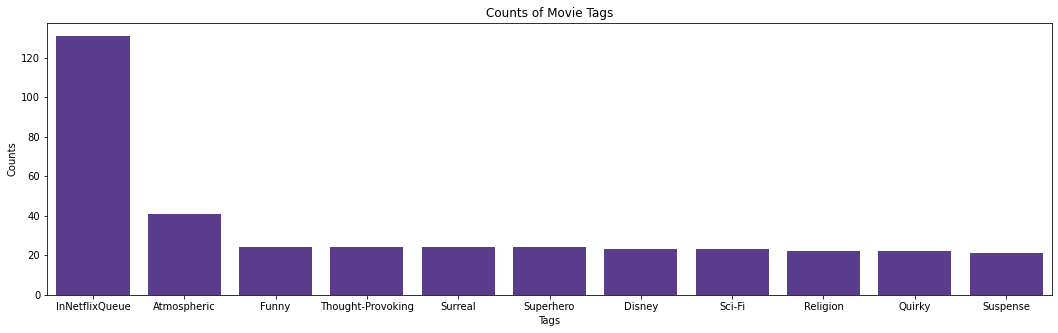

In [30]:
tag_counts_names = tags_df_clean['tag_clean'].value_counts().index
tag_counts_values = tags_df_clean['tag_clean'].value_counts().values

fig, ax = plt.subplots(figsize=(18,5))
# ax.bar(tag_counts_names[:11], tag_counts_values[:11])

sns.barplot(x=tag_counts_names[:11], y=tag_counts_values[:11], color='#572f99', ax=ax)
ax.set_title('Counts of Movie Tags')
ax.set_ylabel('Counts')
ax.set_xlabel('Tags');

### Creating a New DataFrame with Relevant Data

To better understand and work with the separate files, they have been merged to one, larger working file. After cleaning the merged DataFrame, we have 100,836 reviews for 9,724 movies.

In [31]:
# Merging the ratings data with movie titles and genres
merged_df = ratings_df.merge(movies_df, how='outer', on='movieId')
merged_df.head(3)

,userId,movieId,rating,title,genres,split_genres
0,1.0,1,4.0,Toy Story (1995),adventure|animation|children|comedy|fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,5.0,1,4.0,Toy Story (1995),adventure|animation|children|comedy|fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
2,7.0,1,4.5,Toy Story (1995),adventure|animation|children|comedy|fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"


In [32]:
# Checking for nulls after merging
merged_df.isna().sum()

userId          18
movieId          0
rating          18
title            0
genres           0
split_genres     0
dtype: int64

In [33]:
# 18 movies do not have any reviews 
merged_df.tail(20)

,userId,movieId,rating,title,genres,split_genres
100834,610.0,163937,3.5,Blair Witch (2016),horror|thriller,"[Horror, Thriller]"
100835,610.0,163981,3.5,31 (2016),horror,[Horror]
100836,NaN,1076,NaN,"Innocents, The (1961)",drama|horror|thriller,"[Drama, Horror, Thriller]"
100837,NaN,2939,NaN,Niagara (1953),drama|thriller,"[Drama, Thriller]"
100838,NaN,3338,NaN,For All Mankind (1989),documentary,[Documentary]
100839,NaN,3456,NaN,"Color of Paradise, The (Rang-e khoda) (1999)",drama,[Drama]
100840,NaN,4194,NaN,I Know Where I'm Going! (1945),drama|romance|war,"[Drama, Romance, War]"
100841,NaN,5721,NaN,"Chosen, The (1981)",drama,[Drama]
100842,NaN,6668,NaN,"Road Home, The (Wo de fu qin mu qin) (1999)",drama|romance,"[Drama, Romance]"
100843,NaN,6849,NaN,Scrooge (1970),drama|fantasy|musical,"[Drama, Fantasy, Musical]"


In [34]:
# Dropping nulls in data
merged_df.dropna(inplace=True)
merged_df.isna().sum()

userId          0
movieId         0
rating          0
title           0
genres          0
split_genres    0
dtype: int64

In [35]:
merged_df.shape

(100836, 6)

In [36]:
merged_df['movieId'].nunique()

9724

## Modeling

We will be using the Surprise library for this analysis. This library requires that data inputs be limited to three columns of information:

- User
- Movie
- Rating

In [38]:
# Adjusting the dataframe for modeling purposes
model_df = merged_df.drop(['title', 'genres', 'split_genres'], axis=1)

In [39]:
# Contains all movie ratings and the unique identifiers for user and movie
model_df.head()

,userId,movieId,rating
0,1.0,1,4.0
1,5.0,1,4.0
2,7.0,1,4.5
3,15.0,1,2.5
4,17.0,1,4.5


In [40]:
# Converting model_df to surprise accessible data
reader = Reader()
data = Dataset.load_from_df(model_df,reader)

In [41]:
trainset, testset = train_test_split(data, test_size=.2, random_state=42)

In [42]:
print('Number of users: ', trainset.n_users, '\n')
print('Number of items: ', trainset.n_items)

Number of users:  610 

Number of items:  8982


### First Baseline Model

Setting up a baseline model using Surprise's `BaselineOnly` algorithm. 

In [47]:
baseline = BaselineOnly()
baseline.fit(trainset)
base_predictions = baseline.test(testset)

Estimating biases using als...


In [45]:
accuracy.rmse(base_predictions)

RMSE: 0.8734


0.8734341181528673

In [46]:
accuracy.mae(base_predictions)

MAE:  0.6722


0.6722070558104862

#### Cross-Validate Baseline Model

To get a more informative result of the baseline model, we have set up a cross-validation model. The results of the baseline model aren't bad with an RMSE of .87 and an MAE of .67.

In [48]:
cv = cross_validate(baseline, data, n_jobs=3)

In [49]:
for item in cv.items():
    print(item[0])
    print(np.mean(item[-1]))

test_rmse
0.8725267092382474
test_mae
0.6729403071704211
fit_time
0.03453216552734375
test_time
0.05911540985107422


### Checking Other Models

To ensure we're using the best model for our analysis, we will be running all potential algorithms through three-fold cross-validation. 

Our baseline model is still one of the top performers, though SVD++ provided the best results with a mean MAE of .668 and a mean RMSE of .87.

In [50]:
models_list = [NormalPredictor(), BaselineOnly(), KNNBaseline(random_state=42),
               KNNBasic(random_state=42), KNNWithMeans(random_state=42), 
               KNNWithZScore(random_state=42), SVD(random_state=42), 
               SVDpp(random_state=42), NMF(random_state=42), SlopeOne(), 
               CoClustering(random_state=42)]

In [51]:
results_df = pd.DataFrame()

for model in models_list:
    model_dict = {}
    temp_model = cross_validate(model, data, cv=3, n_jobs=3, verbose=False)
    model_dict['model'] = model
    for item in temp_model.items():
        model_dict[f"mean_{item[0]}"] = np.mean(item[-1])
    results_df = results_df.append(model_dict, ignore_index=True, sort=False)

In [52]:
results_df.sort_values('mean_test_mae')

,mean_fit_time,mean_test_mae,mean_test_rmse,mean_test_time,model
7,173.820498,0.667492,0.869913,4.649993,<surprise.prediction_algorithms.matrix_factori...
2,0.074063,0.673639,0.880734,1.257457,<surprise.prediction_algorithms.knns.KNNBaseli...
1,0.024525,0.676030,0.876018,0.087907,<surprise.prediction_algorithms.baseline_only....
6,1.800580,0.678587,0.881408,0.124367,<surprise.prediction_algorithms.matrix_factori...
5,0.069295,0.686453,0.904891,1.109933,<surprise.prediction_algorithms.knns.KNNWithZS...
4,0.054330,0.691837,0.904806,1.012943,<surprise.prediction_algorithms.knns.KNNWithMe...
9,1.791731,0.696619,0.910302,3.989416,<surprise.prediction_algorithms.slope_one.Slop...
8,1.992483,0.717173,0.933922,0.105627,<surprise.prediction_algorithms.matrix_factori...
3,0.047717,0.734475,0.957139,0.903997,<surprise.prediction_algorithms.knns.KNNBasic ...
10,0.869352,0.736345,0.951048,0.097871,<surprise.prediction_algorithms.co_clustering....


### GridSearch of Top Model

To ensure that our top model is living up to its best potential, we are completing a gridsearch of SVD++ to find the best hyperparameters.

# New Users and Predictions

Using the Python script located in the functions.py file within this repo. We are able to create new users who can provide movie ratings and save them to their profile. Users are able to request a number of recommended movies from 1-50 and can specify if they are interested in a specific genre.

In [53]:
new_user_df = merged_df.copy()
new_user_df['username'] = np.nan
new_user_df['password'] = np.nan

In [54]:
new_user_df.tail()

,userId,movieId,rating,title,genres,split_genres,username,password
100831,610.0,160341,2.5,Bloodmoon (1997),action|thriller,"[Action, Thriller]",NaN,NaN
100832,610.0,160527,4.5,Sympathy for the Underdog (1971),action|crime|drama,"[Action, Crime, Drama]",NaN,NaN
100833,610.0,160836,3.0,Hazard (2005),action|drama|thriller,"[Action, Drama, Thriller]",NaN,NaN
100834,610.0,163937,3.5,Blair Witch (2016),horror|thriller,"[Horror, Thriller]",NaN,NaN
100835,610.0,163981,3.5,31 (2016),horror,[Horror],NaN,NaN


In [55]:
test_user = {'userId':611, 
             'movieId':1, 
             'rating':5, 
             'title': 'Toy Story (1995)', 
             'genres': 'Adventure|Animation|Children|Comedy|Fantasy', 
             'username': 'test_user', 
             'password': 'test_user'}

In [56]:
new_user_df = new_user_df.append(test_user, ignore_index=True)
new_user_df.tail()

,userId,movieId,rating,title,genres,split_genres,username,password
100832,610.0,160527,4.5,Sympathy for the Underdog (1971),action|crime|drama,"[Action, Crime, Drama]",NaN,NaN
100833,610.0,160836,3.0,Hazard (2005),action|drama|thriller,"[Action, Drama, Thriller]",NaN,NaN
100834,610.0,163937,3.5,Blair Witch (2016),horror|thriller,"[Horror, Thriller]",NaN,NaN
100835,610.0,163981,3.5,31 (2016),horror,[Horror],NaN,NaN
100836,611.0,1,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,test_user,test_user


In [ ]:
new_user_df = functions.start_program(new_user_df, movies_df, model=baseline)

In [ ]:
new_user_df

## making predictions with surprise (I think we can delete this but am keeping it for now for reference)

In [ ]:
user_to_rate = 2

In [ ]:
# creating a dataframe with a specified user
user_ratings = new_user_df[new_user_df['userId'] == user_to_rate][['userId', 'movieId', 'rating']]
user_ratings.head()

In [ ]:
user_ratings['movieId'].values

In [ ]:
# creating a dataframe with movies not yet reviewed
user_predict = list(movies_df[~movies_df['movieId'].isin(user_ratings['movieId'].values)].movieId.values)
# user_predict

In [ ]:
predictions = []
for movie in user_predict:
    predictions.append((movies_df['title'].loc[movies_df['movieId'] == movie].values[0], \
                        baseline.predict(user_to_rate, movie)[3]))
    

In [ ]:
predicted_df = pd.DataFrame(predictions, columns=['title', 'prediction'])

In [ ]:
final_prediction = predicted_df.merge(movies_df).drop('movieId', axis=1)

In [ ]:
test = final_prediction.sort_values('prediction', ascending=False)

In [ ]:
print(test[test['genres'].str.contains(('romance').title())])

In [ ]:
test

In [ ]:
predicted_df.sort_values('prediction', ascending=False).head(10)

In [ ]:
predictions

In [ ]:
movies_df['split_genres'] = movies_df['genres'].iloc[0:].apply(lambda x: x.lower().split('|'))

movies = []
for i in movies_df['split_genres']:
    for x in i:
        movies.append(x)

In [ ]:
list(set(movies))

In [ ]:
tags_df['tag_clean'] = tags_df['tag'].iloc[0:].apply(lambda x: x.lower().replace(' ', ''))
tags_df['tag_clean'].head()

## Final Model

## Results/Conclusions

### Further Exploration/Questions